In [42]:
def Preprocessing():
    import os
    import shutil
    import glob

    # Define the base directory
    base_dir = './'

    # Define the destination directories
    train_dir = os.path.join(base_dir, 'train')
    val_dir = os.path.join(base_dir, 'val')
    test_dir = os.path.join(base_dir, 'test')

    # Create the destination directories if they don't exist
    for dir_path in [train_dir, val_dir, test_dir]:
        os.makedirs(os.path.join(dir_path, 'male'), exist_ok=True)
        os.makedirs(os.path.join(dir_path, 'female'), exist_ok=True)

    # Initialize lists for training, validation, and test data
    train_x, train_y = [], []
    val_x, val_y = [], []
    test_x, test_y = [], []

    # Debug: Print all files found
    # print("All jpg files found:")
    all_files = glob.glob(os.path.join(base_dir, '**', '*.jpg'), recursive=True)
    # for file in all_files:
    #     print(file)

    # Use glob to find files matching specific patterns
    for filename in all_files:
        try:
            # Extract labels from filename
            temp = os.path.basename(filename).split('_')
            age = int(temp[0])
            gender = int(temp[1])
            ethnicity = str(temp[2])
            file_id = temp[-1].split('.')[0]
            # print(f"Processing file: {filename}, ID: {file_id[-1]}")
            # print(f"Processing file: {filename}, ID: {file_id}")
            id = file_id[-1]
            # Determine gender label
            gender_label = 'male' if gender == 1 else 'female'

            # Append image path and labels to corresponding lists
            if id in {'1', '2', '3', '4'}:
                train_x.append(filename)
                train_y.append(gender)
                dest_dir = os.path.join(train_dir, gender_label)
            # elif file_id == '5':
            #     val_x.append(filename)
            #     val_y.append(gender)
            #     dest_dir = os.path.join(val_dir, gender_label)
            elif id == '5':
                val_x.append(filename)
                val_y.append(gender)
                dest_dir = os.path.join(val_dir, gender_label)
            elif id == '6':
                test_x.append(filename)
                test_y.append(gender)
                dest_dir = os.path.join(test_dir, gender_label)
            else:
                continue

            # Move the file to the corresponding destination directory
            shutil.move(filename, os.path.join(dest_dir, os.path.basename(filename)))

        except ValueError:
            print(f"Ignoring file {filename} due to invalid format.")
            continue

    # Print the lengths of each set
    print("Train Data:", len(train_x))
    print("Validation Data:", len(val_x))
    print("Test Data 1:", len(test_x))

    # print("Files have been moved successfully.")


Train Data: 3358
Validation Data: 839
Test Data 1: 839


In [53]:
x = len(train_x)+len(test1_x)+len(test2_x)
print(x)

4864


In [45]:
'male' if train_y[2100] == 1 else 'female'

'male'

In [60]:
# Show first 5 train_x images
print("First 5 train_x images:")
for i in range(min(5, len(train_x))):
    print(train_x[i])
    # plt.subplot(1, 5, i+1)
    # img = plt.imread(train_x[i])
    # plt.imshow(img, cmap='gray')
    # plt.title((train_y[i]))

First 5 train_x images:
.\Female\age_10\10_0_0_10001.jpg
.\Female\age_10\10_0_0_10002.jpg
.\Female\age_10\10_0_0_10003.jpg
.\Female\age_10\10_0_0_10004.jpg
.\Female\age_10\10_0_0_1001.jpg


FileNotFoundError: [Errno 2] No such file or directory: '.\\Female\\age_10\\10_0_0_10001.jpg'

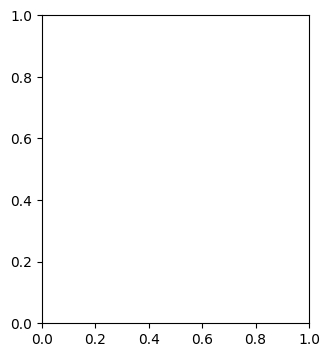

In [56]:
import matplotlib.pyplot as plt

# Plotting the first 5 images in train_x
plt.figure(figsize=(20, 4))
for i in range(min(5, len(train_x))):
    plt.subplot(1, 5, i+1)
    img = plt.imread(train_x[i])
    plt.imshow(img, cmap='gray')
    plt.title((train_y[i]))
    plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()
